# LINEAR REGRESSION

### Libraries are imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data is loaded

In [2]:
fileName = 'data.csv'

In [3]:
cd C:\Users\ivanl\Coding\MLalgorithms\linearRegression

C:\Users\ivanl\Coding\MLalgorithms\linearRegression


### Names for the columns

In [4]:
colNames = ["area", "no. rooms", "price"]
xNames = ["area", "no. rooms"]
yNames = ["price"]

### Data is loaded

In [5]:
data = pd.read_csv(fileName, names = colNames)

### Data is split

In [6]:
dataX = data[xNames]

In [7]:
dataY = data[yNames]

### A quick look to the data is taken

In [8]:
data.head()

,area,no. rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Whether data contains null values is checked

In [9]:
data.isnull().sum().sum() ==0

True

### Data is scaled using standardization

In [10]:
scaler = preprocessing.StandardScaler()

In [11]:
scaledData = data.copy()
scaler.fit(data)
scaledData[colNames] = scaler.transform(data)

### Scaler for variable X

In [12]:
scalerX = preprocessing.StandardScaler()

In [13]:
scalerX.fit(dataX)

StandardScaler()

### Scaler for variable Y

In [14]:
scalerY = preprocessing.StandardScaler()

In [15]:
scalerY.fit(dataY)

StandardScaler()

### Data is split

In [16]:
xScaled = scaledData[xNames]
yScaled = scaledData[yNames]

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(xScaled, yScaled, test_size=0.3, random_state=45)

In [18]:
ytestUnscaled = scalerY.inverse_transform(ytest)

### Model is trained

In [19]:
reg = LinearRegression()

In [20]:
prediction = reg.fit(xtrain, ytrain)

### Prediction for xtest is made

In [21]:
predictionScaled = prediction.predict(xtest)

In [22]:
predictionUnscaled = scalerY.inverse_transform(predictionScaled)

### Error is calculated

In [23]:
rmse = np.sqrt(metrics.mean_squared_error(predictionScaled, ytest))

In [24]:
rmse

0.5611715743138108

In [25]:
rmseUnscaled = np.sqrt(metrics.mean_squared_error(predictionUnscaled, ytestUnscaled))

In [26]:
rmseUnscaled

69418.34687718061

### Evaluate a particular example

In [27]:
example = [[1650, 3]]

In [28]:
exampleDt = pd.DataFrame(data=[[1650, 3]], columns=xNames, index=None)

In [29]:
scalerY.inverse_transform(prediction.predict(scalerX.transform(exampleDt)))

array([[296343.97745152]])

### Data is plotted

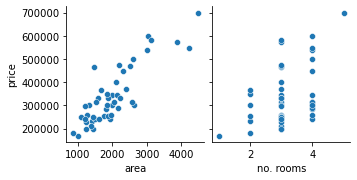

In [30]:
kk = sb.pairplot(data, x_vars=xNames, y_vars=yNames, diag_kind=None)